# Exploratory Data Analysis of 2021 (JORN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

#### OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class

- CH - Canopy Height (meters)
- ARVI - atmospherically resistant vegetation index
- EVI - enhanced vegetation index
- NDVI - normalized difference vegetation index
- SAVI - soil-adjusted vegetation index
- Veg_class - vegetation classification

In [2]:
data = pd.read_csv("JORN21_dataset_v1.csv")
data.isnull().sum()
data.dropna(axis=0,inplace=True)
data.head()

,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,3,3,3,11.2,2.43,0.013333,0.119338,0.090758,0.237412,0.210227,0.187676,0.270899,0.304648,0.279301,0.393630,0.214770,0.193736,0.265742,woody
1,4,4,4,10.2,2.75,0.123333,0.265313,0.206095,0.404770,0.284236,0.253169,0.350252,0.421242,0.374927,0.522831,0.280641,0.257630,0.333867,woody
2,5,5,5,14.0,4.60,0.015000,0.362829,0.350086,0.464428,0.307055,0.305663,0.361262,0.485779,0.477382,0.560481,0.296065,0.295391,0.340641,woody
3,6,6,6,16.8,6.35,0.014000,0.277826,0.303609,0.391677,0.270045,0.260203,0.310201,0.425165,0.436553,0.501630,0.267132,0.264301,0.296636,woody
4,7,7,7,12.2,3.04,0.010000,0.135110,0.135110,0.160633,0.230423,0.230423,0.253389,0.329082,0.329082,0.351473,0.239081,0.239081,0.260661,woody


## Heatmap for Corr.

<AxesSubplot:>

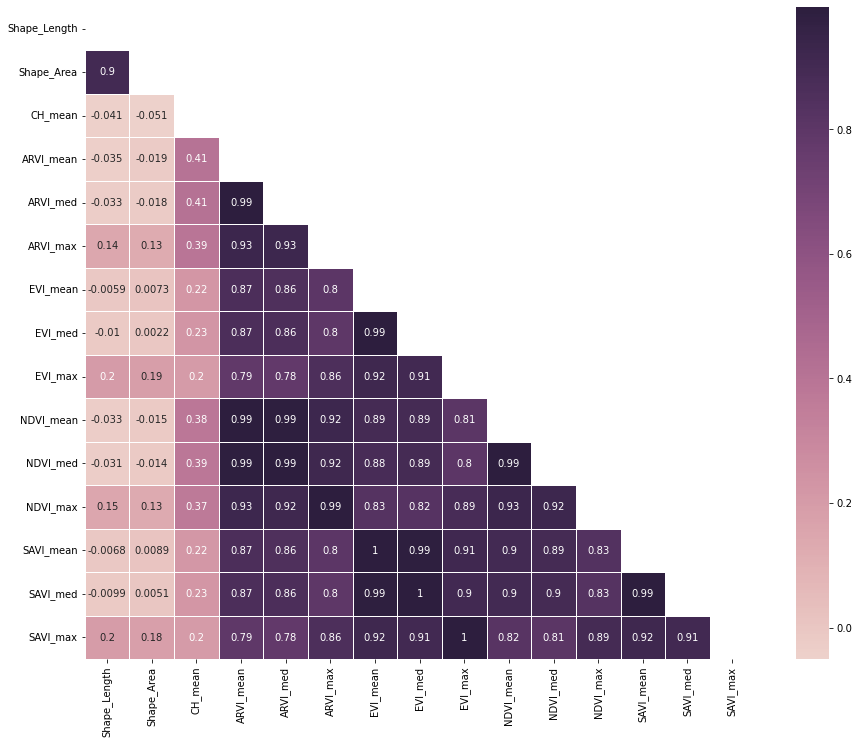

In [3]:
#heatmap of the figure --> this shows some cool stuff
colorpurple = sns.cubehelix_palette(as_cmap=True)
sampledatav2 = pd.read_csv("SRER21_dataset_v1.csv")
sampledatav2.isnull().sum()
sampledatav2.dropna(axis=0,inplace=True)
sampledatav2.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav2.drop(["a"], axis=1, inplace=True)
sampledatav2.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav2.drop(["b"], axis=1, inplace=True)
sampledatav2.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav2.drop(["c"], axis=1, inplace=True)

mask = np.zeros_like(sampledatav2.corr())
plt.figure(figsize=(15,12))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sampledatav2.corr(),cbar=True,annot=True,cmap = colorpurple, linewidths=.5,mask=mask)

## Canopy Height Graph (Mean)

Text(0.5, 0, 'Canopy Height (CH) mean (meters)')

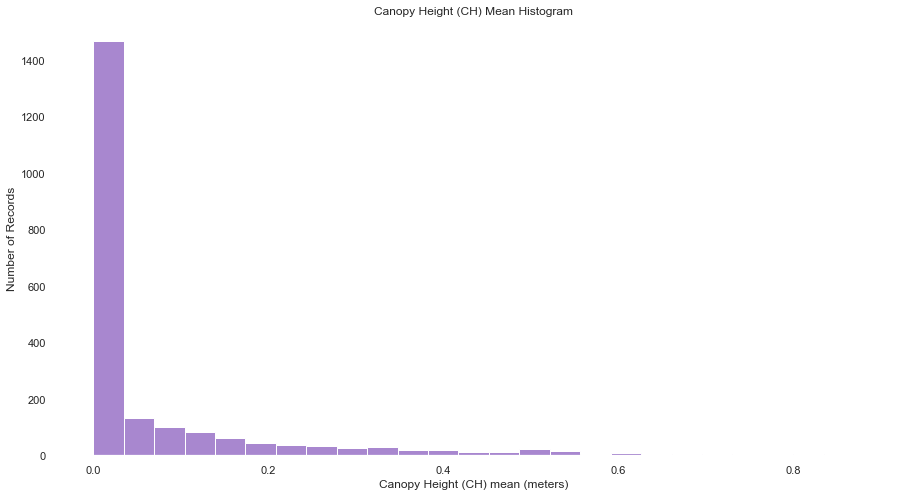

In [4]:
sns.set(rc={"figure.figsize":(15,8)})
plt.figure()
plt.rcParams.update({'axes.facecolor':'white'})
plt.grid(False)
sns.histplot(x="CH_mean",data=data,color="#8B5FBF",bins = 25)
plt.ylabel("Number of Records")
plt.title("Canopy Height (CH) Mean Histogram")
plt.xlabel("Canopy Height (CH) mean (meters)")

## Histogram of Means with a "line of best fit"

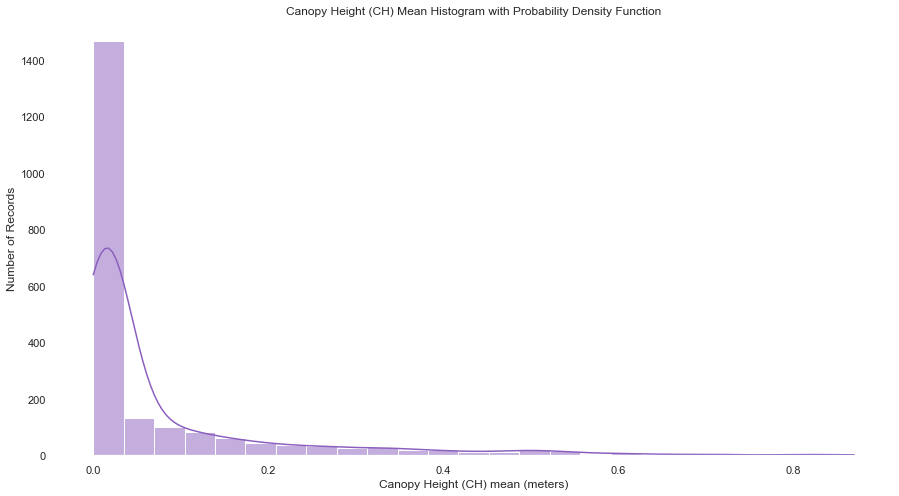

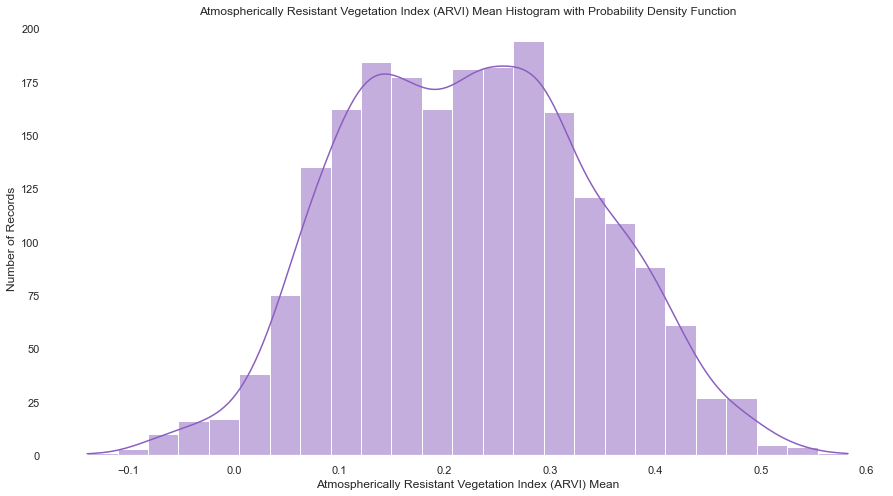

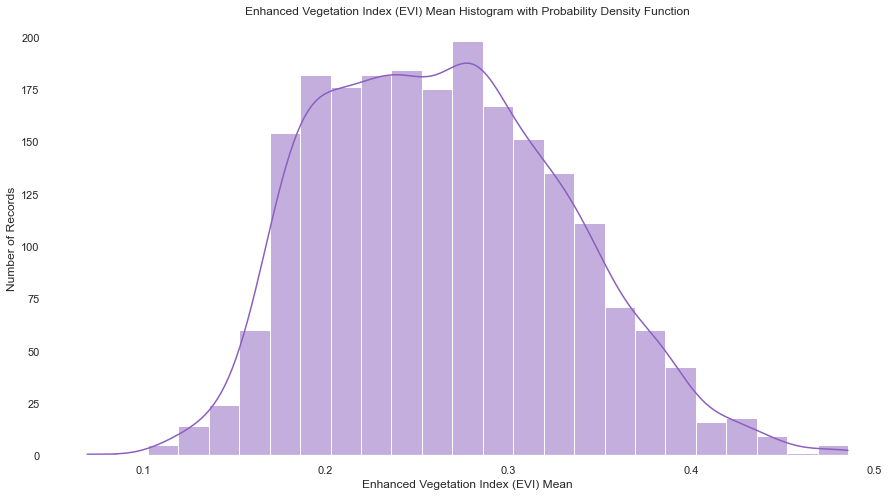

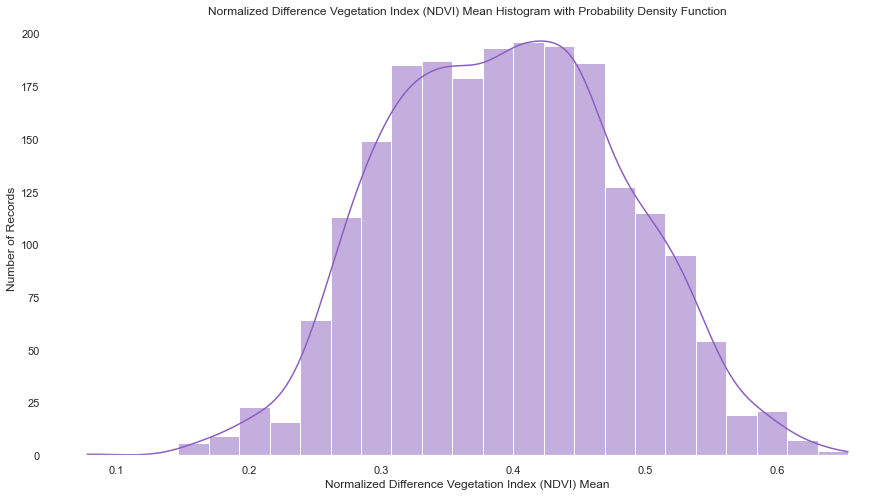

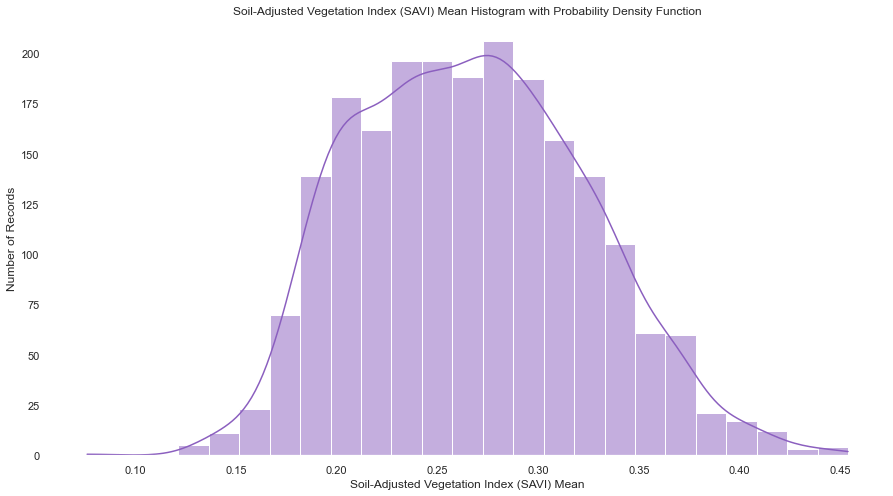

In [5]:
#histogram of means with a "line of best fit"
category = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure()
    plt.rcParams.update({'axes.facecolor':'white'})
    plt.grid(False)
    sns.histplot(x=i,data=data,color="#8B5FBF",bins = 25, kde = True)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")

## Histogram of Medians with a "line of best fit"

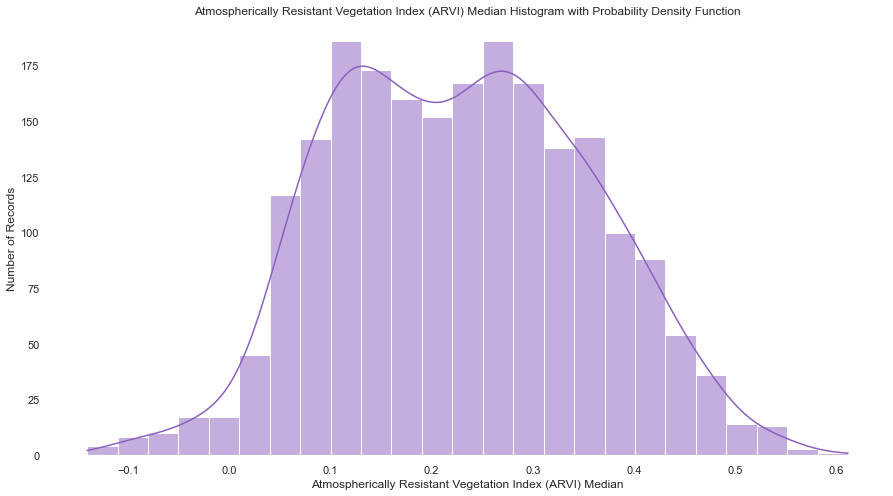

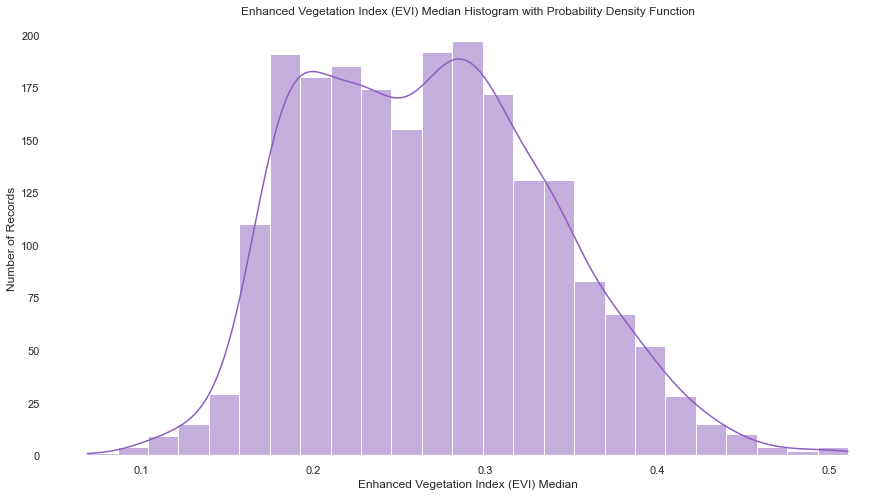

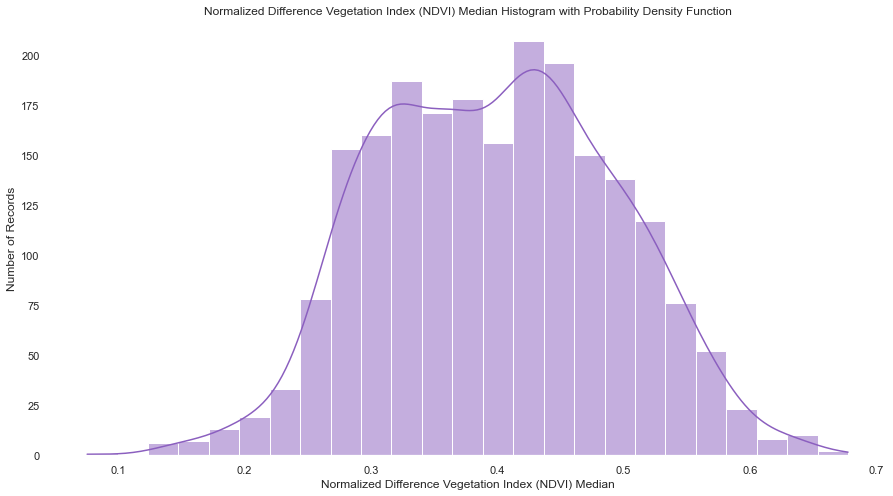

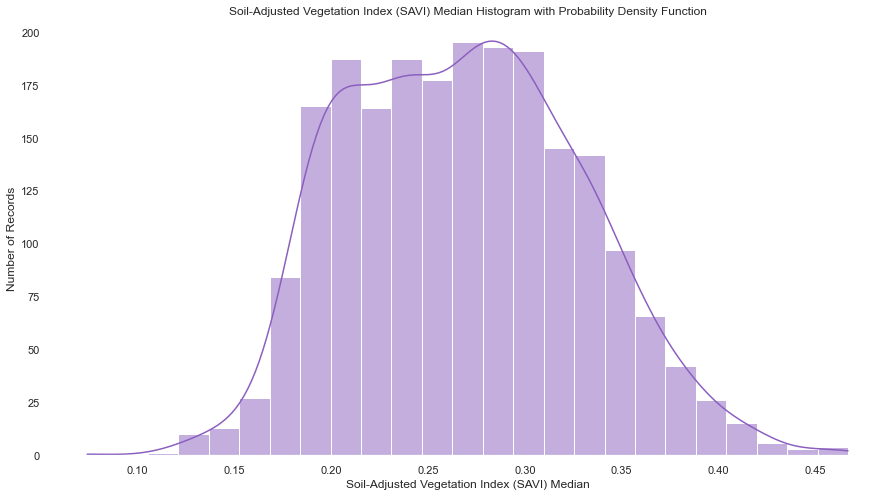

In [6]:
#histogram of medians with a "line of best fit"

category = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"]
for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure()
    plt.rcParams.update({'axes.facecolor':'white'})
    plt.grid(False)
    sns.histplot(x=i,data=data,color="#8B5FBF",bins = 25, kde = True)
    plt.ylabel("Number of Records")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    

## Histogram of Maximums with a "line of best fit"

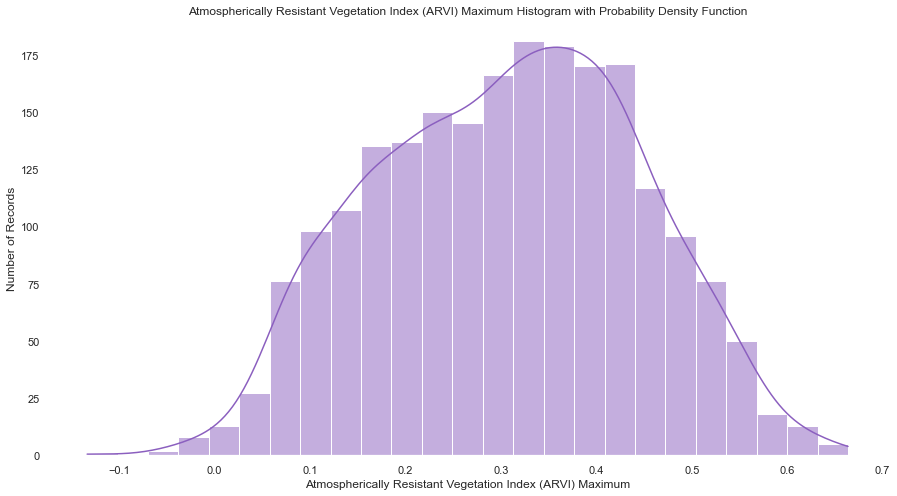

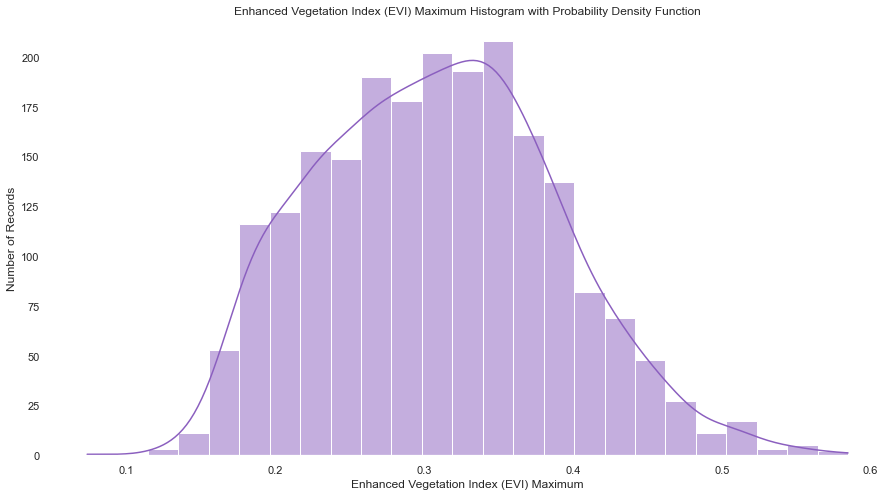

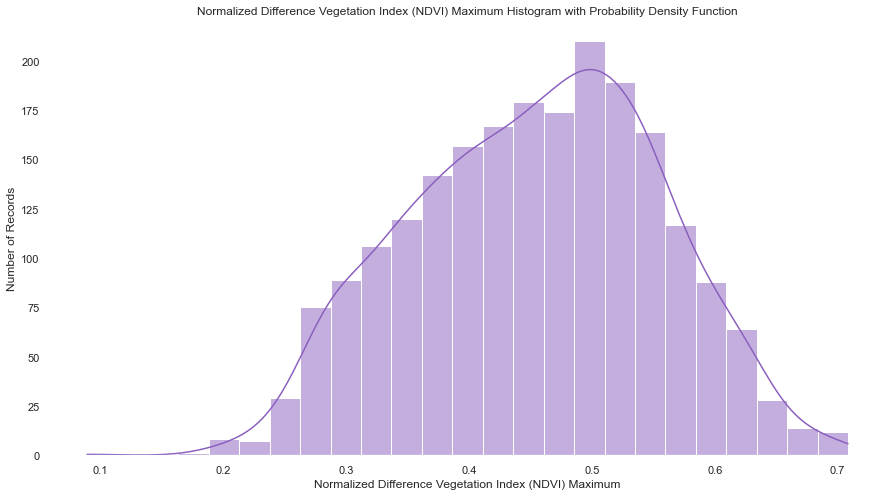

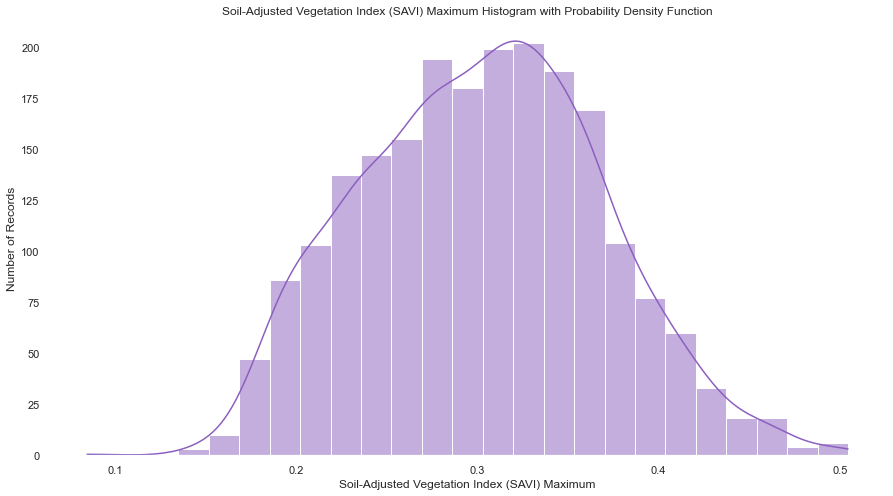

In [7]:
#histogram of maximums with a "line of best fit"

category = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"]
for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure()
    plt.rcParams.update({'axes.facecolor':'white'})
    plt.grid(False)
    sns.histplot(x=i,data=data,color="#8B5FBF",bins = 25, kde = True)
    plt.ylabel("Number of Records")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")

## Veg_class Pie Chart & Histogram

Text(0.5, 0, 'Vegetation Class')

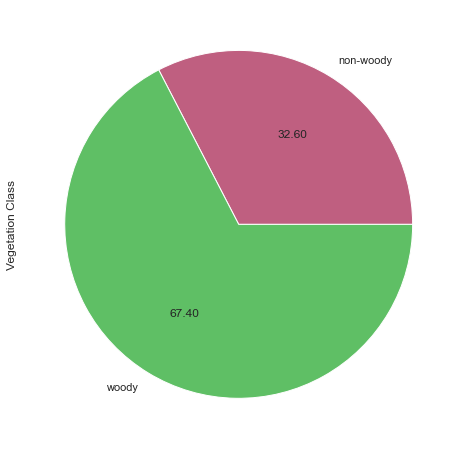

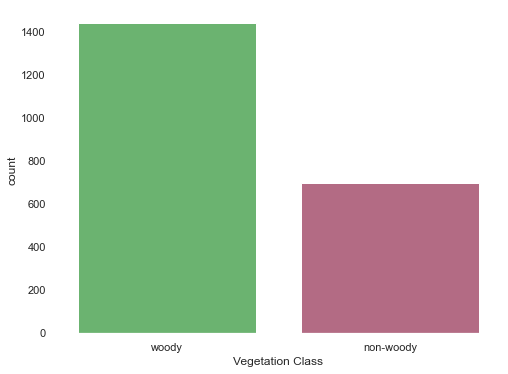

In [8]:
from matplotlib.pyplot import pie, axis, show
from cycler import cycler

my_colors = ["#bf5f80","#5fbf65"]
sns.set_palette(my_colors)
plt.figure()
plt.rc('axes')
data.groupby('Veg_class').size().plot(kind='pie', autopct='%.2f')
plt.ylabel("Vegetation Class")

my_colors = ["#5fbf65", "#bf5f80"]
sns.set_palette(my_colors)
plt.figure(figsize=(8,6))
sns.countplot(x=data["Veg_class"])
plt.xlabel("Vegetation Class")

## Many Pairplots

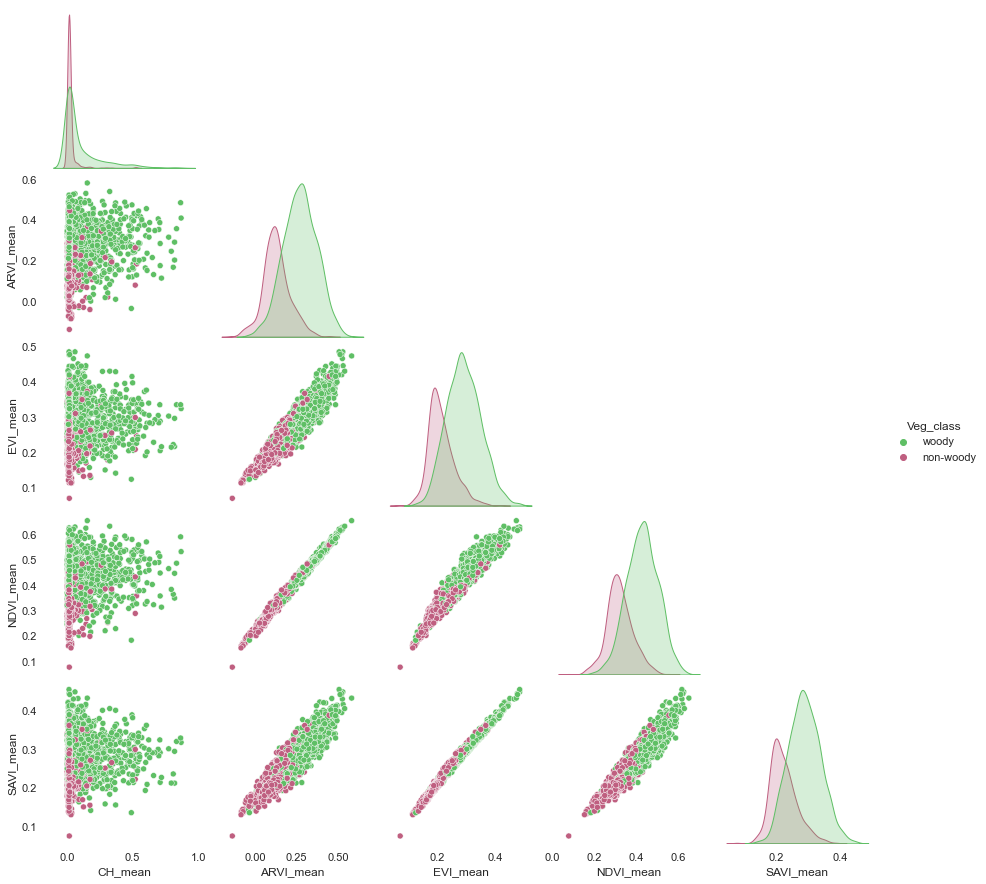

In [9]:
#All mean variable pairplot
me = sns.pairplot(data, hue="Veg_class", x_vars = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"],corner=True)

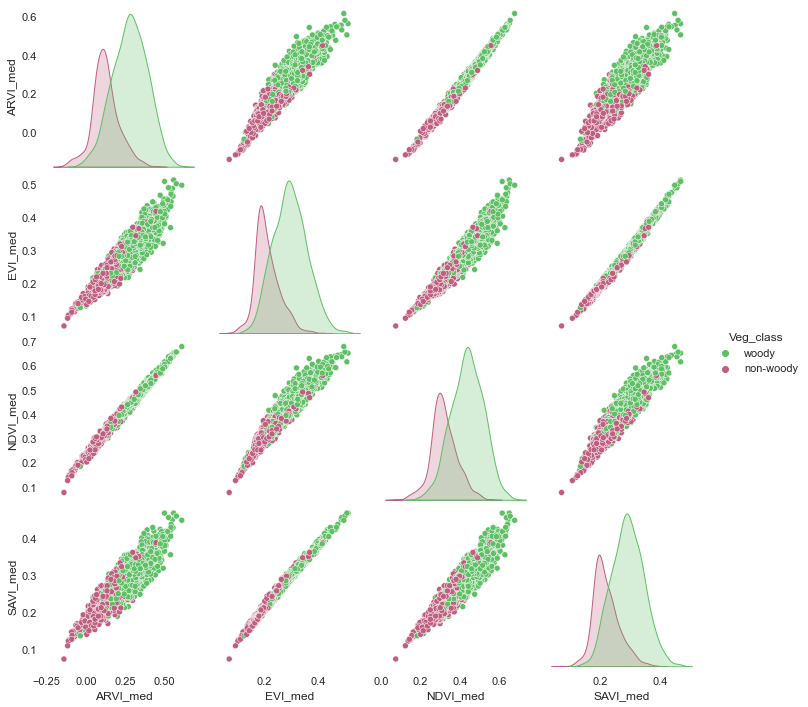

In [10]:
med = sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"], y_vars = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"])

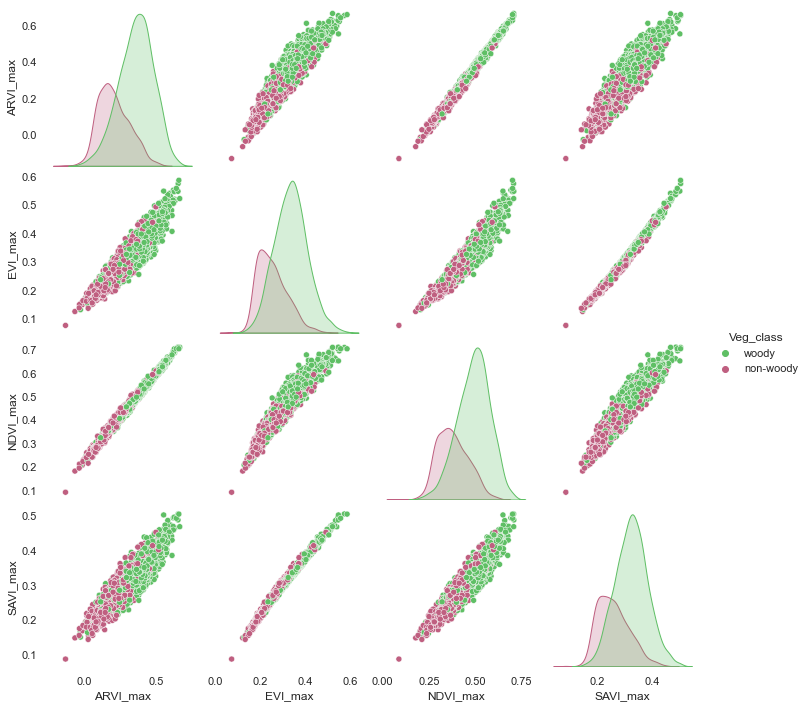

In [11]:
ma= sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"], y_vars = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"])

In [12]:
data['CH_mean'].mean()

0.07601126557683288

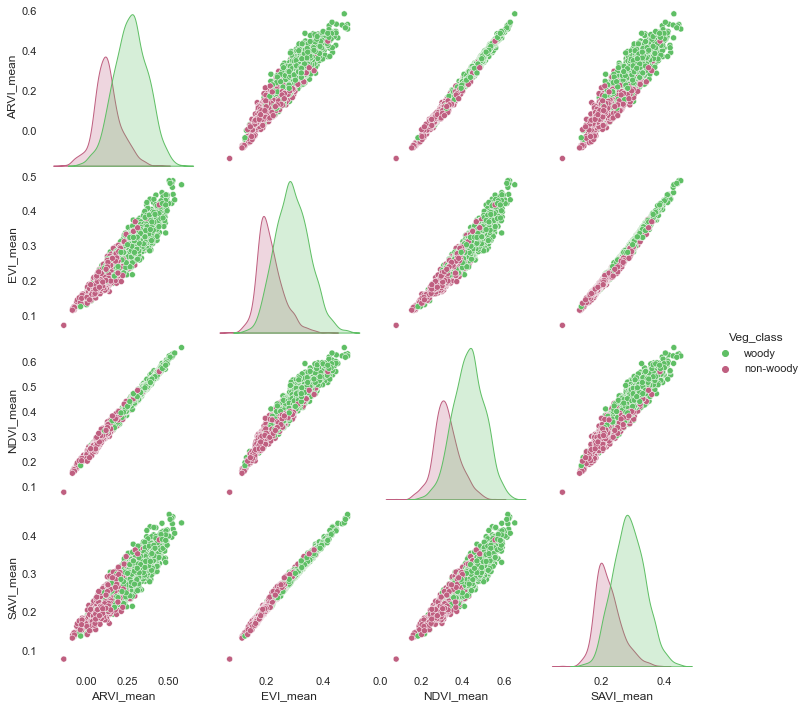

In [13]:
mewch = sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"])

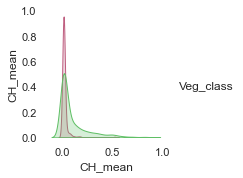

In [14]:
med = sns.pairplot(data, hue="Veg_class", x_vars = "CH_mean", y_vars = "CH_mean")

## Boxplot for Data

<AxesSubplot:>

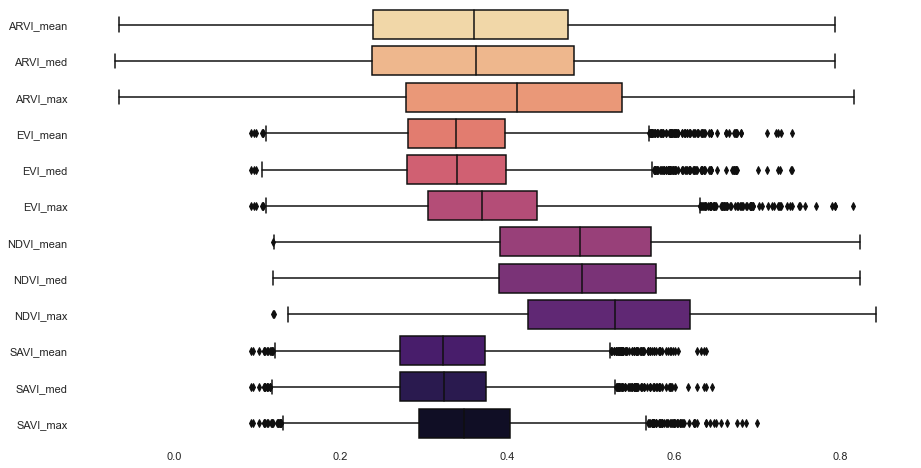

In [15]:
sampledatav3 = pd.read_csv("SRER21_dataset_v1.csv")
sampledatav3.isnull().sum()
sampledatav3.dropna(axis=0,inplace=True)
sampledatav3.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav3.drop(["a"], axis=1, inplace=True)
sampledatav3.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav3.drop(["b"], axis=1, inplace=True)
sampledatav3.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav3.drop(["c"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Length":"d"}, axis="columns", inplace=True)
sampledatav3.drop(["d"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Area":"e"}, axis="columns", inplace=True)
sampledatav3.drop(["e"], axis=1, inplace=True)
sampledatav3.rename({"CH_mean":"f"}, axis="columns", inplace=True)
sampledatav3.drop(["f"], axis=1, inplace=True)

sns.boxplot(data=sampledatav3, orient="h", palette="magma_r")

### Fractional Woody Cover Preliminary Math

In [16]:
totalarea = 0
woodyarea = 0
nonwoodyarea = 0
 
w = 0
nw = 0

shapearea = data["Shape_Area"]
vegclassi = data["Veg_class"]

for x in data.index:
    totalarea += shapearea[x]
    if vegclassi[x] == "woody":
        woodyarea += shapearea[x]
        w += 1
    if vegclassi[x] == "non-woody":
        nonwoodyarea += shapearea[x]
        nw += 1
print(woodyarea)
print(nonwoodyarea)
print(totalarea)

print(w)
print(nw)

FWC = woodyarea / totalarea * 100

print(FWC)

9600.469999980374
39259.26000001202
48859.72999999244
1443
698
19.649044315189336


#### Full code of all variables histogram with kde

In [17]:
"""
category = ["CH_mean","ARVI_mean","ARVI_med","ARVI_max","EVI_mean","EVI_med","EVI_max","NDVI_mean","NDVI_med","NDVI_max","SAVI_mean","SAVI_med","SAVI_max"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure()
    plt.rcParams.update({'axes.facecolor':'white'})
    plt.grid(False)
    sns.histplot(x=i,data=data,color="#8B5FBF",bins = 25, kde = True)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")
"""


'\ncategory = ["CH_mean","ARVI_mean","ARVI_med","ARVI_max","EVI_mean","EVI_med","EVI_max","NDVI_mean","NDVI_med","NDVI_max","SAVI_mean","SAVI_med","SAVI_max"]\n\nfor i in category:\n    sns.set(rc={"figure.figsize":(15,8)})\n    plt.figure()\n    plt.rcParams.update({\'axes.facecolor\':\'white\'})\n    plt.grid(False)\n    sns.histplot(x=i,data=data,color="#8B5FBF",bins = 25, kde = True)\n    plt.ylabel("Number of Records")\n    if i == "CH_mean":\n        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")\n        plt.xlabel("Canopy Height (CH) mean (meters)")\n    if i == "ARVI_mean":\n        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")\n        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")\n    if i == "ARVI_med":\n        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")\n        plt.xlabel("Atmosphe